<a href="https://colab.research.google.com/github/04bhavyaa/computer_vision/blob/main/gradient_edge_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Apply Prewitt, Robert, and Scharr filters to an image to identify edges. For each filter, determine the gradients (gx and gy), calculate the magnitude and angle of the edges, and display the original image, gx, gy, magnitude, and angle.

In [5]:
import cv2

# Load an image from a file
image = cv2.imread('image.png')

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not load image. Please check the file path.")
else:
    print("Image loaded successfully.")

Image loaded successfully.


In [15]:
import numpy as np
from matplotlib import pyplot as plt

# Convert the image to grayscale for edge detection
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Function to apply filter, calculate magnitude and angle, and display results
def apply_filter_and_display(image, filter_name, kernel_x, kernel_y):
    # Apply the filter
    gx = cv2.filter2D(image, cv2.CV_64F, kernel_x)
    gy = cv2.filter2D(image, cv2.CV_64F, kernel_y)

    # Calculate magnitude and angle
    magnitude = np.sqrt(gx**2 + gy**2)
    angle = np.arctan2(gy, gx) * (180 / np.pi) # Convert radians to degrees

    # Display the results
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 5, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 5, 2)
    plt.imshow(gx, cmap='gray')
    plt.title(f'{filter_name} Gx')
    plt.axis('off')

    plt.subplot(1, 5, 3)
    plt.imshow(gy, cmap='gray')
    plt.title(f'{filter_name} Gy')
    plt.axis('off')

    plt.subplot(1, 5, 4)
    plt.imshow(magnitude, cmap='gray')
    plt.title(f'{filter_name} Magnitude')
    plt.axis('off')

    plt.subplot(1, 5, 5)
    plt.imshow(angle, cmap='hsv') # Use HSV colormap for angles
    plt.title(f'{filter_name} Angle')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

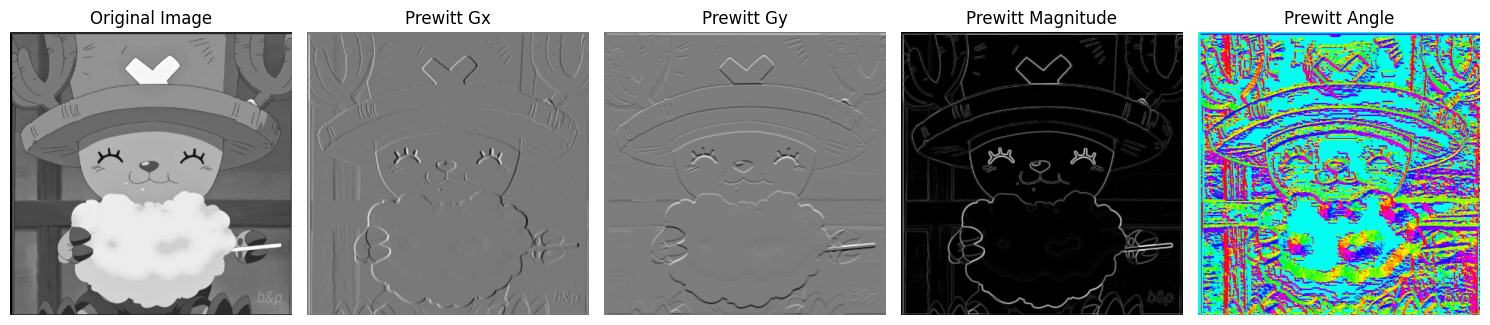

In [16]:
# Prewitt kernels
prewitt_kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)
prewitt_kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32)

# Apply and display results
apply_filter_and_display(gray_image, 'Prewitt', prewitt_kernel_x, prewitt_kernel_y)

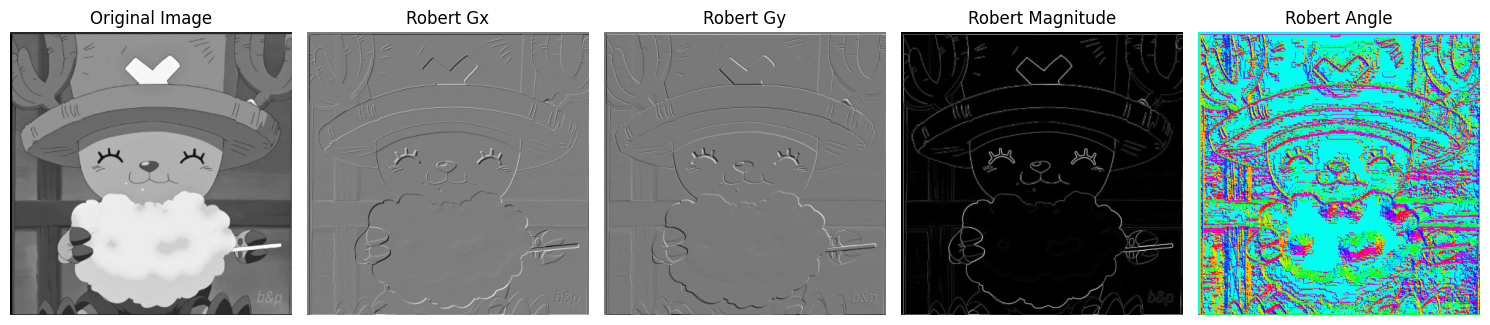

In [17]:
# Robert kernels
robert_kernel_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
robert_kernel_y = np.array([[0, -1], [1, 0]], dtype=np.float32)

# Apply and display results
apply_filter_and_display(gray_image, 'Robert', robert_kernel_x, robert_kernel_y)

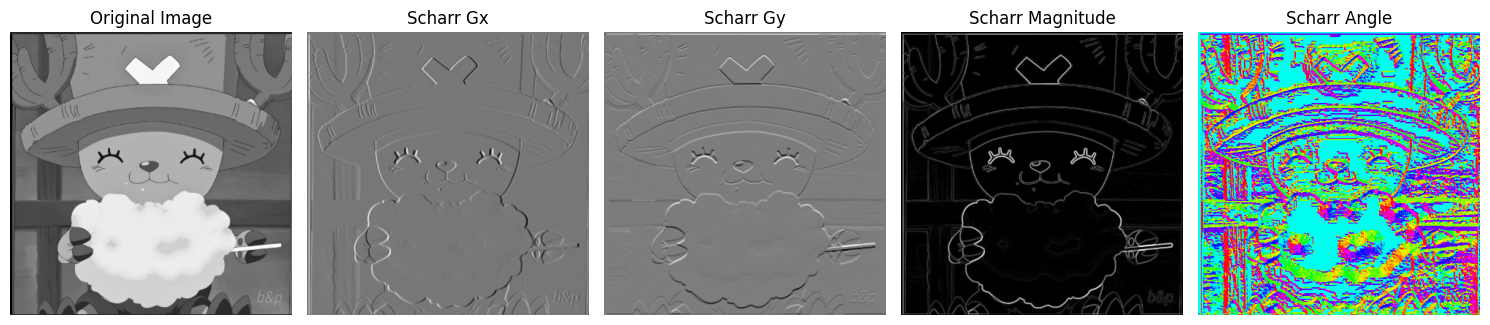

In [18]:
# Scharr kernels
scharr_kernel_x = np.array([[-3, 0, 3], [-10, 0, 10], [-3, 0, 3]], dtype=np.float32)
scharr_kernel_y = np.array([[-3, -10, -3], [0, 0, 0], [3, 10, 3]], dtype=np.float32)

# Apply and display results
apply_filter_and_display(gray_image, 'Scharr', scharr_kernel_x, scharr_kernel_y)